# ** In this notebook I will be Exploring the Iris flower dataset**
# The data set consists of 150 records of Iris flowers, including information about their sepal and petal length and width, as well as the type of Iris flower.
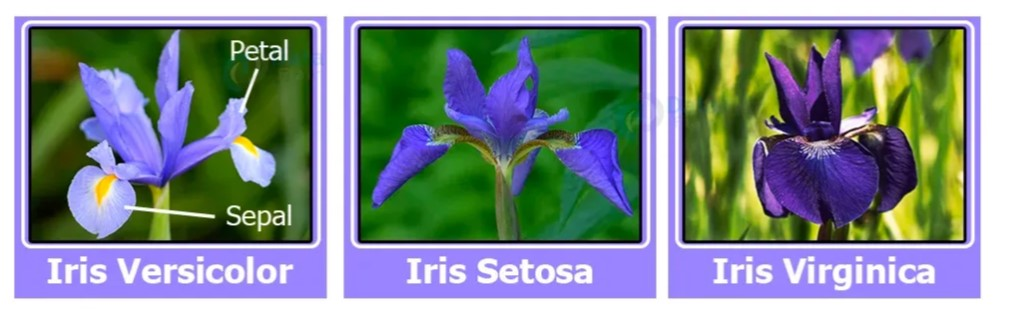

Data Variables

*   Sepal_length: Sepal length, in centimeters, used as input.
*   Sepal_width: Sepal width, in centimeters, used as input.
*   Petal_length: Petal length, in centimeters, used as input.
*   Petal_width: Petal width, in centimeters, used as input.
*   Class: Iris Setosa, Versicolor, or Virginica, used as the target.



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import IRIS dataset
from sklearn import datasets # sklearn is the Python name of scikit-learn
iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
print(iris['target_names']) # or, equivalently, print(iris.target_names)

['setosa' 'versicolor' 'virginica']


# Getting a sense of data

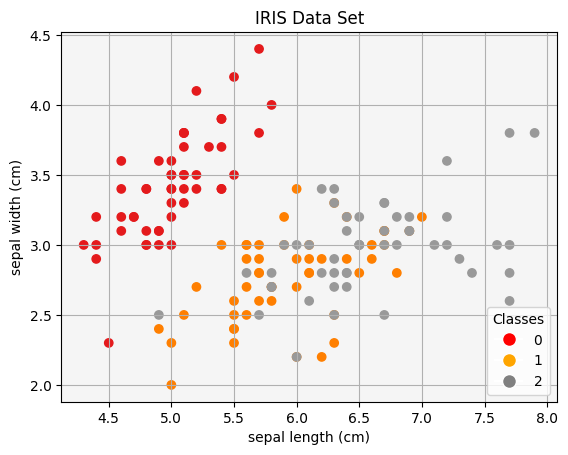

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=plt.get_cmap('Set1', 3))
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], title='IRIS Data Set')
# Create a custom legend with correct labels and colors
legend_labels = [str(i) for i in range(3)]  # Labels 0, 1, 2
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ['red', 'orange', 'gray']]
ax.legend(legend_handles, legend_labels, loc="lower right", title="Classes")
# Adding grid
ax.grid(True)
# Adding a background color
ax.set_facecolor('#f5f5f5')

## **Test Set for Model Assessment**
1. In using scikit-learn, we conventionally use X and y to refer to a data matrix and targets, respectively;
2. Although train_test_split function can receive an arbitrary number of
sequences to split, in supervised learning it is common to use this function with a data matrix and targets only;
3. Although train_test_split function returns a list, it is common to use sequence unpacking to name the results of the split;
4. By default train_test_split function shuffles the data before splitting. This
is a good practice to avoid possible systematic biases in the data; however, to be able to reproduce the results, it is also a good practice to set the seed of random number generator. This is done by setting random_state to an integer;
5. The test_size argument of the function represents the proportion of data that
should be assigned to the test set. The default value of this parameter is 0.25,which is a good rule of thumb if no other specific proportion is desired; and
6. It is a good practice to keep the proportion of classes in both the training and the test sets as in the whole data. This is done by setting the stratify to variable representing the target.

### We use stratified random split to divide the given data into 80% training and 20% test

In [ ]:
from sklearn.model_selection import train_test_split
# Using stratified random split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=100, stratify=iris.target)


In [ ]:
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: '+ str(y_test.shape))

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)


In [ ]:
X_train_df = pd.DataFrame(X_train, columns=iris.feature_names)
y_train_df = pd.DataFrame(y_train, columns=['class'])
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)

In [ ]:
X_y_train_df['class'] = X_y_train_df['class'].astype(str)

In [ ]:
print(X_y_train_df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')


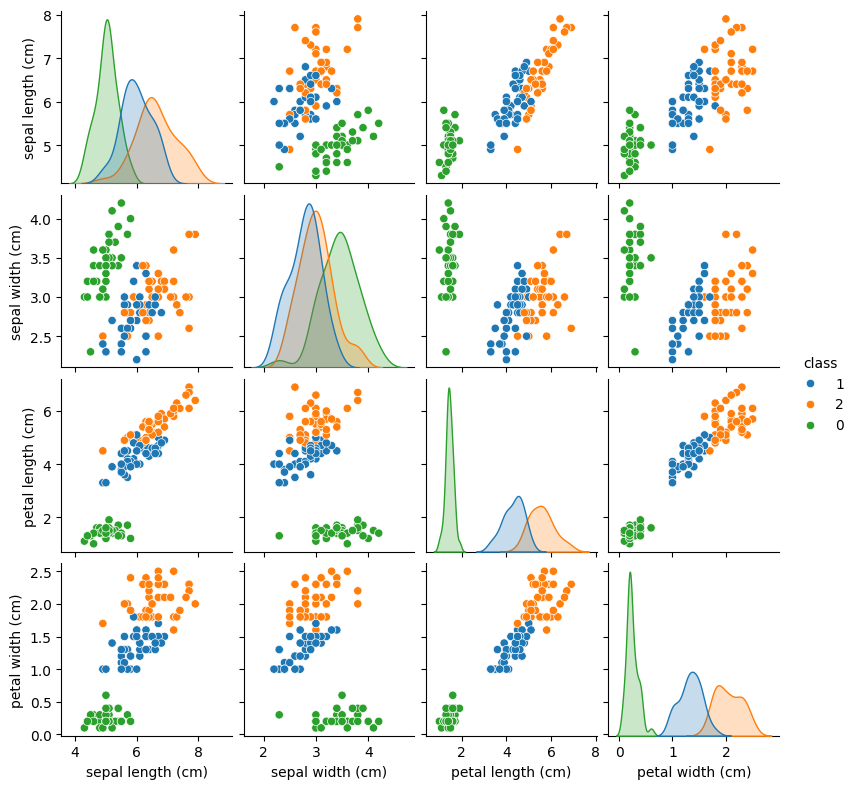

In [ ]:
# hue is set to the class variable in the dataframe so that they are plotted in different color and we are able to distinguish classes
sns.pairplot(X_y_train_df, hue='class', height=2)

In [ ]:
print(X_y_train_df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')


# *Normalization*

In [ ]:
mean = X_train.mean(axis=0) # to take the mean across rows (for each column)
std = X_train.std(axis=0) # to take the std across rows (for each column)
X_train_scaled = X_train - mean # notice the utility of broadcasting
X_train_scaled /= std  # or similarly X_train_scaled = X_train_scaled/std

In [ ]:
print ('the mean of the data across rows is', mean)
print('the standard devaiation of data across rows', std)
print('the scaled training data', X_train_scaled)

the mean of the data across rows is [5.8775     3.07916667 3.77166667 1.21083333]
the standard devaiation of data across rows [0.8314107  0.42581213 1.7773193  0.76754976]
the scaled training data [[-0.09321506 -1.12530064  0.12847063 -0.01411418]
 [ 0.02706244 -0.18591924  0.24099965  0.37673996]
 [ 0.74872744 -0.18591924  0.97243829  0.7675941 ]
 [ 0.98928243  0.04892611  0.35352867  0.24645525]
 [ 2.43261243  1.69284358  1.47881888  1.02816352]
 [ 2.19205743 -1.12530064  1.76014143  1.41901766]
 [ 0.02706244 -0.18591924  0.74738025  0.7675941 ]
 [-0.45404756 -1.59499135  0.01594161 -0.14439889]
 [ 0.14733994  0.75346217  0.40979318  0.50702467]
 [ 0.98928243  0.51861682  1.08496731  1.15844823]
 [-0.21349256  1.69284358 -1.16561311 -1.18667659]
 [ 1.10955993  0.28377147  1.19749633  1.41901766]
 [-0.21349256 -0.42076459  0.24099965  0.11617054]
 [-1.17571256 -1.36014599  0.40979318  0.63730938]
 [ 2.19205743 -0.18591924  1.31002535  1.41901766]
 [-0.57432506  0.75346217 -1.16561311 

In [ ]:
X_train_scaled.mean(axis=0) # observe the mean is 0 now
X_train_scaled.std(axis=0) # observe the std is 1 now
updated_std= X_train_scaled.std(axis=0)
print('show me the scaled standard devaition', updated_std)

show me the scaled standard devaition [1. 1. 1. 1.]


In [ ]:
X_test_scaled = X_test - mean
X_test_scaled /= std

In [ ]:
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[-0.20547406 -0.25637284 -0.03844742 -0.07491371]
[0.94499306 1.07303169 0.94790626 0.94534006]


# *Saving the training and testing data to avoid preprocessing steps (used: numpy.save() to binary files. --> can be loaded via could be loaded by numpy.load() )*

In [ ]:
np.savez('iris_train_scaled', X = X_train_scaled, y = y_train)
np.savez('iris_test_scaled', X = X_test_scaled, y = y_test)

# *Model Training*

# *k-nearest neighbors (kNN) classification rule in its standard form*

In [55]:
from sklearn.neighbors import KNeighborsClassifier as kNN
knn = kNN(n_neighbors=5)    # hyperparameter k is set to 3, that is, we have 3NN

In [56]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# *Prediction using the trained model*

In [57]:
xx_test = np.array([[5.5, 2, 1.1, 0.6]]) # same as: np.array([5.5, 2, 1.1, 0.6]).reshape(1,4)
xx_test.shape

(1, 4)

In [58]:
xx_test_scaled = (xx_test - mean) / std

In [59]:
xx_test_scaled

array([[-0.45404756, -2.53437275, -1.50320017, -0.79582245]])

In [60]:
y_test_prediction = knn.predict(xx_test_scaled)

In [61]:
print('knn predicts: ' + str(iris.target_names[y_test_prediction])) #to convert the prediction (y_test_prediction) to the names of Iris flower

knn predicts: ['versicolor']


In [62]:
y_test_predictions = knn.predict(X_test_scaled)

In [63]:
print('knn predicts: ' + str(iris.target_names[y_test_predictions]))

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


In [47]:
y_test_predictions = kNN(n_neighbors=2).fit(X_train_scaled, y_train).predict(X_test_scaled)

In [64]:
print('knn predicts: ' + str(iris.target_names[y_test_predictions]))

knn predicts: ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor']


# *Model Evalution*
We can find the probability
of misclassification by the trained classifier.

In [65]:
errors = (y_test_predictions != y_test)
errors

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False])

In [66]:
error_est = sum(errors)/errors.size
print('The error rate estimate is: {:.2f}'.format(error_est) + '\n'\
'The overall accuracy is: {:.2f}'.format(1-error_est))

The error rate estimate is: 0.10
The overall accuracy is: 0.90


In [69]:
from sklearn.metrics import accuracy_score
print('The accuracy is {:.2f}'.format(accuracy_score(y_test,y_test_predictions)))

The accuracy is 0.90
